In [2]:
'''
Building Good training sets- Data preprocessing.
The quality of the data and the amount of useful information that it contains are key factors that determine how well
a machine learning algorithm can learn.Therefore, it is absolutely critical that we make sure to examine and preprocess a dateset
before we feed it to a learning algorithm.

We will disucc the following:
    => Removing and imputing missing values from the dataset.
    => Getting categorical data into shape for machine learning algorithms
    => Selecting relevant features for the model construction.

'''

'\nBuilding Good training sets- Data preprocessing.\nThe quality of the data and the amount of useful information that it contains are key factors that determine how well\na machine learning algorithm can learn.Therefore, it is absolutely critical that we make sure to examine and preprocess a dateset\nbefore we feed it to a learning algorithm.\n\nWe will disucc the following:\n    => Removing and imputing missing values from the dataset.\n    => Getting categorical data into shape for machine learning algorithms\n    => Selecting relevant features for the model construction.\n\n'

In [3]:
'''
Dealing with missing data

It is not uncommon in real-world application for our samples to be missing one or more values for various reason. There 
could have been an error in the data collection process, certain measurements are not applicable, or particular fields could have
been simply left blank in  survey, for example. We typically see missing values as the blank spaces in our data table
or as placeholders strings such as NaN, which stands for not a number or Null.
'''

'\nDealing with missing data\n\nIt is not uncommon in real-world application for our samples to be missing one or more values for various reason. There \ncould have been an error in the data collection process, certain measurements are not applicable, or particular fields could have\nbeen simply left blank in  survey, for example. We typically see missing values as the blank spaces in our data table\nor as placeholders strings such as NaN, which stands for not a number or Null.\n'

In [4]:
'''
Identifyinh missing values in tabular data
'''
# Imports
#! pipenv install pandas

'\nIdentifyinh missing values in tabular data\n'

In [5]:

import pandas as pd
from io import StringIO
csv_data=\
    '''
    A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,
    '''
df=pd.read_csv(StringIO(csv_data))

'''
Using the preceding code, we read CSV-formatted data into a pandas DataFrame via the read_csv function and noticed
that the two missing cells were replaced by NaN. The StringIO function in the preceding code example was simply
used for the purpose of illustration. It allows us to read the string assigned to csv_data into a pandas DataFrame
as if it was regular CSv file in our hard drive.

For a larger DataFrame, it can be tedious to look for missing values manually; in this case we can use the isnull method
to return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is
missing (True)
'''
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
#Using the sum method, we cna then return the number of missing values per column as follows:
df.isnull().sum()

    A    0
B        0
C        1
D        1
dtype: int64

In [7]:
#================
# dropping rows with missing rows
df.dropna(axis=0)
#=======================

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
'''
Although scikit-learn was developed for working with NumPy arrays, it can sometimes be more convinient to preprocess data using
pandas' DataFrame. We can always access the underlying NumPy array of a DataFrame via the values attribute before we feed it 
into scikit-learn estimator.
'''

"\nAlthough scikit-learn was developed for working with NumPy arrays, it can sometimes be more convinient to preprocess data using\npandas' DataFrame. We can always access the underlying NumPy array of a DataFrame via the values attribute before we feed it \ninto scikit-learn estimator.\n"

In [9]:
'''
Eliminating samples or features with missing values

One of the easiest ways to deal with missing data is to simply remove the corresponding features(columns) or samples(rows)
from the dataset entirely: rows with misssing values can be easily dropped via the dropna method:


'''

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
'''Similarly, we can drop columns that have at least one NaN in any row by setting the axis argument to 1:'''

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [11]:
'''The dropna method supports several additional parameters that can come in handy:
only drop rows where all columns are NaN
(returns the whole array here since we dont have a row with where all values are NaN)'''

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
'''Drop rows that have less than 4 real values'''
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [13]:
'''Only Drop rows where NaN appears in specific columns (here:'C')'''
df.dropna(subset=['C'])


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [14]:
'''Although the removal of missing data seems to be convinient approach, it also comes with certain disadvanatges;
for example , we may end up removing too many samples, which will make a reliable analysis impossible.Or, if we remove
too many feature columns, we will run the risk of losing valuable information that our classifiers needs to discriminate
between classes'''

'Although the removal of missing data seems to be convinient approach, it also comes with certain disadvanatges;\nfor example , we may end up removing too many samples, which will make a reliable analysis impossible.Or, if we remove\ntoo many feature columns, we will run the risk of losing valuable information that our classifiers needs to discriminate\nbetween classes'

In [15]:
'''Imputing missing values'''

'''Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might
lose too much valuable data.In this case, we can use different interpolation techniques to estimate the missing values
from the other training samples in our dataset. One of the most common interpolation techniques is mean imputation, where
 we simply replace the missing value with  the mean value of the entire feature column. A convinient was to achieve this is
 by using the Imputer class from scikit-learn'''

#! pipenv install scikit-learn


'Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might\nlose too much valuable data.In this case, we can use different interpolation techniques to estimate the missing values\nfrom the other training samples in our dataset. One of the most common interpolation techniques is mean imputation, where\n we simply replace the missing value with  the mean value of the entire feature column. A convinient was to achieve this is\n by using the Imputer class from scikit-learn'

In [16]:

from sklearn.impute import SimpleImputer
# The above needed to change from (from sklearn.preprocessing import Imputer ) to the above
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
# The missing values needed to change from (missing_value='NaN') to (missing_values=np.nan)
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [17]:
#! pipenv install numpy

In [18]:
'''Here we have replaced each NaN value with the corresponding mean, which is seperatley calculated for each column.
Other options for the strategy parameter are median or most_frequent'''

'Here we have replaced each NaN value with the corresponding mean, which is seperatley calculated for each column.\nOther options for the strategy parameter are median or most_frequent'

In [19]:
'''Understanding the scikit-learn estimator API'''

'''The Imputer class belongs to the so called transformer classes in scikit-learn, which are used for data transformation
The two essential methods for those estimators are fit and transform. The fit method is used to learn the parameters from
the training data, and the transform method uses those parameters to trasnform the data. Any data array that is to be
transformed needs to have the same number of features as the data array that was used to fit the model.
The classifiers that we used in the previous chapters belong to the so called estimators in scikit learn with an API that
is conceptually very similar to the transformer class.Estimators have a predict method but can also have a tranform method.
As you may recall, we also used the fit method to learn the parameters of a model when we trained those estimators for classification
However, in supervised learning tasks, we additionally provide the class labels for fitting the model, which cna then be used
to make predictions about new data samples via the predict method'''

'The Imputer class belongs to the so called transformer classes in scikit-learn, which are used for data transformation\nThe two essential methods for those estimators are fit and transform. The fit method is used to learn the parameters from\nthe training data, and the transform method uses those parameters to trasnform the data. Any data array that is to be\ntransformed needs to have the same number of features as the data array that was used to fit the model.\nThe classifiers that we used in the previous chapters belong to the so called estimators in scikit learn with an API that\nis conceptually very similar to the transformer class.Estimators have a predict method but can also have a tranform method.\nAs you may recall, we also used the fit method to learn the parameters of a model when we trained those estimators for classification\nHowever, in supervised learning tasks, we additionally provide the class labels for fitting the model, which cna then be used\nto make predictions ab

In [20]:
'''Handling Categorical Data'''

'''
Norminal and ordinal features

Ordinal features can be understood as categorical values that can be sorted or ordered. In contrast nominal features
don't imply any order for example in a tshirt the sizes can be ordinal and colour nominal
'''


"\nNorminal and ordinal features\n\nOrdinal features can be understood as categorical values that can be sorted or ordered. In contrast nominal features\ndon't imply any order for example in a tshirt the sizes can be ordinal and colour nominal\n"

In [21]:
'''Creating an example dataset'''
import pandas as pd
df_shirt=pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])

df_shirt.columns=['color','size','price','classlabel']
df_shirt

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [22]:
'''
Mapping ordinal features
To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string
values into integers.Unfortunately, there is no convinient function that can automatically derive the correct order of the labels
for our size feature,so we have to define the mapping manually
'''

'\nMapping ordinal features\nTo make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string\nvalues into integers.Unfortunately, there is no convinient function that can automatically derive the correct order of the labels\nfor our size feature,so we have to define the mapping manually\n'

In [23]:
size_mapping={
    'XL':3,
    'L':2,
    'M':1
}

df_shirt['size']=df_shirt['size'].map(size_mapping)

df_shirt

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [24]:
'''If we want to transform the integer values back to the original string representation at a later stage, we can
simply define a reverse-mapping dictionary inv_size_mapping={v:k for k, v in size_mapping.items()} that can then be used
via the pandas map method on the transformed feature column,similar to the size_mapping dictionary that we used
previously'''

inv_size_mapping={v:k for k ,v in size_mapping.items()}
df_shirt['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [25]:
'''Encoding class labels'''

'''
Many machine learning libraries require that class labels are encoded as integer values. Although most estimators for classification
in scikit-learn convert class labels to integers internally, it is considered good practice to provide class labels as integer
arrays to avoid technical glitches. To encode the class labels, we can use an approach similar to the mapping of ordinal features
discussed previously. We need to remember that class labels are not ordinal, and it doesn't matter which integer number we
asign to a particular string label. Thus we can enumerate the class label.

'''

import numpy as np

class_mapping={label:idx for idx, label in enumerate(np.unique(df_shirt['classlabel']))}

class_mapping

{'class1': 0, 'class2': 1}

In [26]:
'''Next , We can use the mapping dictionary to transform the class labels into integers:'''
df_shirt['classlabel']=df_shirt['classlabel'].map(class_mapping)
df_shirt


,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [27]:
'''We can reverse the key valuep pairs in the mapping dictionary as follows to map the converted class labels back to
the original string representation:'''

inv_class_mapping={v:k for k, v in class_mapping.items()}
df_shirt['classlabel']=df_shirt['classlabel'].map(inv_class_mapping)
df_shirt

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [28]:
'''Alternatively, there is a convenient LabelEncoder class directly implemented in scikit-learn '''
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df_shirt['classlabel'].values)
y

array([0, 1, 0])

In [29]:
'''Note that the fit_transform method is just a shortcut for calling fit and transform seperately, and we can use the
inverse_transform method to transform the integer class label back into their original string representation:'''

class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [30]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [31]:
'''Performing one-hot Encoding on nominal features'''

'''
Since scikit-learn estimators for classification treat class labels as categorical data that does not imply any order
(nominal), we used the convenient LabelEncoder to encode the string lables into integers. It may appear
that we could use a similar approach  to transform the nominal color of our dataset,as follows:
'''

X=df_shirt[['color','size','price']].values
color_le=LabelEncoder()

X[:,0]=color_le.fit_transform(X[:,0])
X

'''
After executing the precedding code, the first column of the NumPy array X now holds the new color values, which are 
encoded as follows:
blue=0
green=1
red=2

'''

'\nAfter executing the precedding code, the first column of the NumPy array X now holds the new color values, which are \nencoded as follows:\nblue=0\ngreen=1\nred=2\n\n'

In [32]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [33]:
'''If we stop at this point and feed the array to our classifier, we will make one of the most common mistakes
in dealing with categorical data.Although the color values don't come in any particular order, a learning algorithm
 will now assume that green is larger than blue, and red is larger than green. Although this assumption is incorrect,
 the algorithm could still produce useful results. However, those results would not be optimal.
 A common workaround for this problem is to use a technique called one-hot encoding.The idea behind this approach is to create
 a new dummy feature for each unique value in the nominal feature column. Here, we would convert the color feature into 
 three new features: blue, green, and red. Binary values can then be used to indicate the particular color of a sample.'''

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [34]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [35]:
'''Skipping one hot encoding for now'''


'Skipping one hot encoding for now'

In [36]:
'''Partitioning a dataset into seperate training and test sets'''

'''
The samples belong to one of three different classes, 1,2,3 which refer to the three different types of grapes grown 
in the same region in italy but derived from different wine culitvars.

A convinient way to randomly partition this dataset into seperate test and training datasets is to use the train_test_split
function from scikit-learn's model_selection submodule
'''

df_wine=pd.read_csv('wine.data',header=None)

In [37]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
df_wine.columns=['Class label','Alcohol',
                 'Malic acid','Ash',
                 'Alcalinity of ash','Magnesium',
                 'Total phenols','Flavanoids',
                 'Nonflavanoids phenols',
                 'Proanthocyanins','Color intensity',
                 'Hue','OD280/OD315 od diluted wines',
                 'Proline'
                 ]
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [39]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 od diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
from sklearn.model_selection import train_test_split
X_wine=df_wine.iloc[:, 1: ].values
y_wine=df_wine.iloc[:, 0].values

a=X_wine.shape
b=y_wine.shape

a,b

((178, 13), (178,))

In [41]:
X_wine_train,X_wine_test,y_wine_train,y_wine_test=train_test_split(X_wine,y_wine,test_size=0.3,random_state=0,stratify=y_wine)


In [42]:
'''
First we assigned the NumPy array representation of the feature columns 1-13 to the variable X_wine; We assigned the class
labels from the first column to the variable y. Then, we used the train_test_split function to randomly split X_wine and 
y_wine into seperate  training and test datasets. By setting test_size=0.3 we assigned 30% of the wine samples to
X_wine_test and y_wine_test and the remaining 70 percent to X_wine_train and y_wine_train respectively.Providing the class
label array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the
original dataset.
'''



'\nFirst we assigned the NumPy array representation of the feature columns 1-13 to the variable X_wine; We assigned the class\nlabels from the first column to the variable y. Then, we used the train_test_split function to randomly split X_wine and \ny_wine into seperate  training and test datasets. By setting test_size=0.3 we assigned 30% of the wine samples to\nX_wine_test and y_wine_test and the remaining 70 percent to X_wine_train and y_wine_train respectively.Providing the class\nlabel array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the\noriginal dataset.\n'

In [43]:
X_wine_test.shape

(54, 13)

In [44]:
'''Bringing feature onto the same scale'''

'''
Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. Decision trees and random
forests are two of the very few machine learning algorithms where we don't need to worry about feature scaling. Those
algorithms are scale invariant. However, the majority of machine learning and optimization algorithms behave much better
if features are on the same scale. There are two common approaches to bring different features  onto the same scale:
normalization and standardization. Normalization referes to the rescaling of the feature to a range of [0,1], which is a 
special case of min-max scaling.

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval
standardization can be more practical for many machine learning algorithms, especially for optimization algorithms such as
gradient decent.for this reason many linear models, such as logistic regression and SVM initialize the weights to 0 or small
random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the
feature columns takes the form of a normal distribution , which makes it easier to learn the weights. Furthermore standardization
maintains useful information about outliers and make the algorithm less sensitive to them in contrast to min-max scaling, which
scales the data to a limited range of values.
'''

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_wine_train_norm=mms.fit_transform(X_wine_train)
X_wine_test_norm=mms.fit(X_wine_test)
#X_wine_test_norm=mms.fit(X_wine_test)


In [45]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_wine_train_std=stdsc.fit_transform(X_wine_train)
X_wine_test_std=stdsc.transform(X_wine_test)

In [46]:
'''If we are dividing a dataset into training and test datasets, we have to keep in mind that we are withholding valuable
information that the learning algorithm could benefit from. Thus, we dont want to allocate too much information to the test
set, the more inaccurate the estimation of the generalization error. Dividing a dataset into training and test sets is all about
balancing this trade-off.'''

'If we are dividing a dataset into training and test datasets, we have to keep in mind that we are withholding valuable\ninformation that the learning algorithm could benefit from. Thus, we dont want to allocate too much information to the test\nset, the more inaccurate the estimation of the generalization error. Dividing a dataset into training and test sets is all about\nbalancing this trade-off.'

In [47]:
'''Selecting meaningful features'''

'''
If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong
indicator of overfitting(high variance)

Common solutions to reduce the generalization error are listed as follows:
=> Collect more training data.
=>Introduce a penalty for complexity via regularization.
=>Choose a simpler model with fewer parameters.
=> Reduce the dimensionality of the data.

Collecting more training data is often not applicable.
'''

'\nIf we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong\nindicator of overfitting(high variance)\n\nCommon solutions to reduce the generalization error are listed as follows:\n=> Collect more training data.\n=>Introduce a penalty for complexity via regularization.\n=>Choose a simpler model with fewer parameters.\n=> Reduce the dimensionality of the data.\n\nCollecting more training data is often not applicable.\n'

In [48]:
'''L1 and L2 regularization as penalties against model complexity'''

'''
L2 is an approach to reduce the complexity of a model by penalizing large individual weights.L1 regularization replaces
the square  of the weights by the sum of the absolute values of the weights. In contrast to L2 regularization usually yield
 sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional
 dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples.
 in this sense, L1 regularization can be understood as a technique for feature selection.

 A Geometric interpretation of L2 regularization

 As mentioned L2 regularization adds a penalty term to the cost function that effectively results in less extreme weight
 values compared to a model trained with an unregularized cost function.
'''

'\nL2 is an approach to reduce the complexity of a model by penalizing large individual weights.L1 regularization replaces\nthe square  of the weights by the sum of the absolute values of the weights. In contrast to L2 regularization usually yield\n sparse feature vectors; most feature weights will be zero. Sparsity can be useful in practice if we have a high-dimensional\n dataset with many features that are irrelevant, especially cases where we have more irrelevant dimensions than samples.\n in this sense, L1 regularization can be understood as a technique for feature selection.\n\n A Geometric interpretation of L2 regularization\n\n As mentioned L2 regularization adds a penalty term to the cost function that effectively results in less extreme weight\n values compared to a model trained with an unregularized cost function.\n'

In [49]:
'''Sparse solution with L1 regularization'''

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_wine_train_std,y_wine_train)
print('Training accuracy: ', lr.score(X_wine_train_std,y_wine_train))


Training accuracy:  1.0


In [50]:
#lr.fit(X_wine_test_std,y_wine_test)

#print('Test accuracy: ',lr.score(X_wine_test_std,y_wine_test))

In [51]:
lr.coef_

array([[ 1.24613003,  0.1803182 ,  0.74515216, -1.1627703 ,  0.        ,
         0.        ,  1.16434545,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55331268,  2.5094863 ],
       [-1.53983737, -0.38554467, -0.99553912,  0.36355979, -0.05885448,
         0.        ,  0.66624315,  0.        ,  0.        , -1.93123176,
         1.23846237,  0.        , -2.23208405],
       [ 0.13476087,  0.17031086,  0.35757667,  0.        ,  0.        ,
         0.        , -2.43313791,  0.        ,  0.        ,  1.56247173,
        -0.81708087, -0.49732003,  0.        ]])

In [52]:
import numpy as np
import matplotlib.pyplot as plt


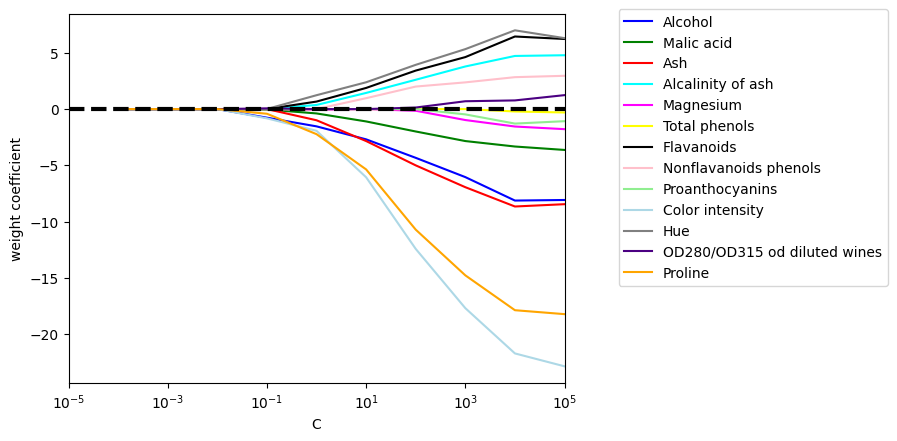

In [53]:
fig=plt.figure()
ax=plt.subplot(111)
'''colors=['blue','green','red','cyan',
        'magenta','yellow','black',
        'pink','lightgreen','lightblue',
        'gray','indigo','orange']'''
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

#weights=np.array([])
#params=np.array([])
weights,params=[],[]
for c in np.arange(-4.,6.):
    lr=LogisticRegression(penalty='l1',C=10.**c,random_state=0,solver='liblinear')
    lr.fit(X_wine_train_std,y_wine_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    #weights.append(lr.coef_[1])
    #params.append(10**c)
weights=np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)

plt.show()

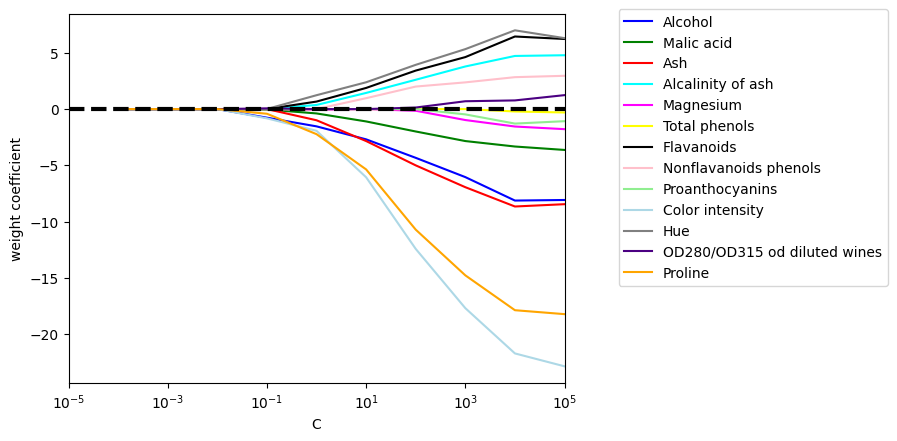

<Figure size 640x480 with 0 Axes>

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0,solver='liblinear'
                            )
    lr.fit(X_wine_train_std, y_wine_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.savefig("features-of-the-wine-dataset")

In [55]:
'''Sequnetial feature selection algorithm'''

'''
An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection.
which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques:
feature selection and feature extraction. Via feature selection, we select a subset of the original features, whereas in feature
extraction, we derive information from the feature set to construct a new subspace.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial 
d-dimensional feature space to a k-dimensional feature subspace where k<d.The motivation behind feature selection algorithm
is to automatically select a subset of features that are most relevant to the problem, to improve computational effeciency or
reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms
that don't support regularization.

A classical sequential feature selection aglorithm is Sequential Backward Selection (SBS), which aims to reduce the dimensionality
of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency.
In certain cases SBS can even improve the predictive power of the model if a model suffers from overfitting.


Greedy algorithms make locally optimal choices at each stage of a combinatorial search problem and generally yield a suboptimal
solution to the problem, in contrast to exhaustive search algorithms, which evaluate all possible combinations and guaranteed to find
the optimal solution. However in practice, an exhaustive search is often comoutationally not feasible, whereas greedy algorithms
allow for a less complex computationally more efficient solution.

The idea begind the SBS is quite simple: SBS sequentially removes features from the full feature subset until the new feature
subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need
to define the criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be
the difference in performance of the classifier before and after the removal of a particular feature that maximizes this
criterion; or in more intuitive terms, at ecah stage we eliminate the feature that causes the least performance loss after 
removal.
'''



"\nAn alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection.\nwhich is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques:\nfeature selection and feature extraction. Via feature selection, we select a subset of the original features, whereas in feature\nextraction, we derive information from the feature set to construct a new subspace.\n\nSequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial \nd-dimensional feature space to a k-dimensional feature subspace where k<d.The motivation behind feature selection algorithm\nis to automatically select a subset of features that are most relevant to the problem, to improve computational effeciency or\nreduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms\nthat don't support regularizatio

In [56]:
from sklearn.base import clone
from itertools import combinations
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state

    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)

        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_=[score]

        while dim > self.k_features:
            scores=[]
            subnets=[]

            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subnets.append(p)

            best=np.argmax(scores)
            self.indices_=subnets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        return self

    def transform(self,X):
        return X[:,self.indices_]

    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score    

In [57]:
'''
In the preceeding implementation, we defined the k_features paramete to specify the desired number of features we want to return. By default
we use the accuracy_score from scikit-learn to evaluate the performance of the model(an estimator for classification) on the feature subsets. Inside
the while loop of the fit method, the feature subsets created by the itertools.combination function are evaluated and reduced until the feature subset
has the desired dimensionality. In each iteration, the accuracy of the score best subset is collected in a list, self.scores_, based on the internally created
test dataset X_test. We will use those scores later to evaluate the results. The column indices of the final feature subset are assigned to self.indices_, which
we can use via the transform method to return a new data array with the selected feature columns.Note that instead of calculating the criterion explicitly inside
the fit method, we siimply remove the featur that is not contained in the best performing feature subset. 

Although our SBS implementation already splits the dataset into a test and training dataset inside the fit function, we still fed the training dataset X_train to
the algorithm. The SBS fit method will then create new training subsets for testing(validation) and training, which is why this test is also called the
validation dataset. This approach is necessary to prevent our original test set from becoing part of the training data.


While we did not increase the performance of the KNN model by reducing the number of features, we shrank the size if the dataset, which can be useful in real
world applications that may involve expensive data collection steps. Also by substantially reducing the number of features, we obtain simpler models, which
are easier to interpret.




'''

'\nIn the preceeding implementation, we defined the k_features paramete to specify the desired number of features we want to return. By default\nwe use the accuracy_score from scikit-learn to evaluate the performance of the model(an estimator for classification) on the feature subsets. Inside\nthe while loop of the fit method, the feature subsets created by the itertools.combination function are evaluated and reduced until the feature subset\nhas the desired dimensionality. In each iteration, the accuracy of the score best subset is collected in a list, self.scores_, based on the internally created\ntest dataset X_test. We will use those scores later to evaluate the results. The column indices of the final feature subset are assigned to self.indices_, which\nwe can use via the transform method to return a new data array with the selected feature columns.Note that instead of calculating the criterion explicitly inside\nthe fit method, we siimply remove the featur that is not contained i

In [58]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from sbs import SBS


knn=KNeighborsClassifier(n_neighbors=5)
sbs=SBS(knn,k_features=1)
sbs.fit(X_wine_train_std,y_wine_train)

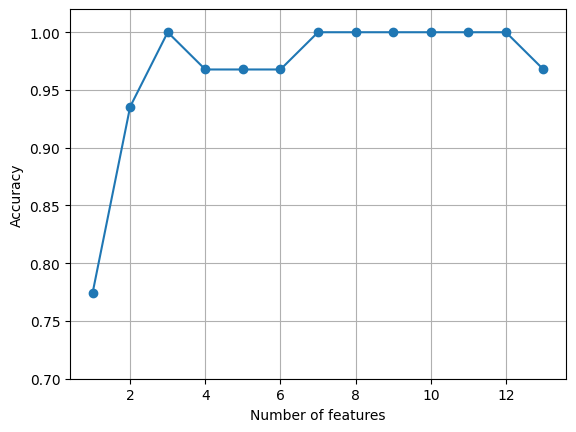

In [59]:
k_feat=[len(k) for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [60]:
k3=list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 od diluted wines'], dtype='object')


In [61]:
knn.fit(X_wine_train_std,y_wine_train)
print("Training accuracy: ",knn.score(X_wine_train_std,y_wine_train))
print("Test accuracy: ",knn.score(X_wine_test_std,y_wine_test))

Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


In [62]:
knn.fit(X_wine_train_std[:,k3],y_wine_train)
print("Training accuracy: ",knn.score(X_wine_train_std[:,k3],y_wine_train))
print("Testing accuracy: ",knn.score(X_wine_test_std[:,k3],y_wine_test))


Training accuracy:  0.9516129032258065
Testing accuracy:  0.9259259259259259


In [63]:
'''ADD notes above before proceeding'''



'ADD notes above before proceeding'

In [64]:
'''Assessing feature importance with random forests'''


'''
Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any
assumptions about whether our data is linearly separable or not. Conviniently, the random forest implementation in scikit-learn already collects the feature
importance values for us so that we can access them via the feature_importance_ attribute after fitting a RandomForestClassifier
'''

'\nUsing a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any\nassumptions about whether our data is linearly separable or not. Conviniently, the random forest implementation in scikit-learn already collects the feature\nimportance values for us so that we can access them via the feature_importance_ attribute after fitting a RandomForestClassifier\n'

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 od diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoids phenols          0.013354
13) Ash                            0.013279


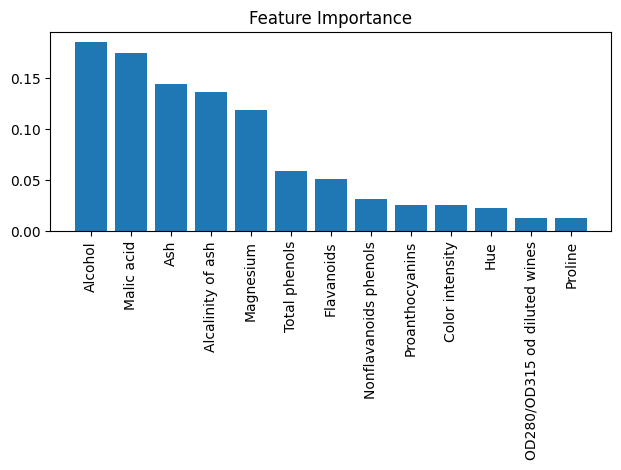

In [68]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_wine_train,y_wine_train)
importances=forest.feature_importances_

indices=np.argsort(importances)[::-1]

for f in range (X_wine_train.shape[1]):
    #
     print("%2d) %-*s %f" % (f +1,30,feat_labels[indices[f]],importances[indices[f]]))
     #print("%2d) %-*s %f" % (f + 1, 30, 
                            #feat_labels[indices[f]], 
                            #importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_wine_train.shape[1]),
        importances[indices],align='center')

plt.xticks(range(X_wine_train.shape[1]),feat_labels,rotation=90)

plt.xlim([-1,X_wine_train.shape[1]])
plt.tight_layout()
plt.show()

In [69]:
'''
We can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most
discriminative features in the dataset based on the average impurity decrease in the 500 decision trees: Interestingly,two of the top ranked features in the
plot are also in the three-feature subset selection from the SBS algorithm. However as far as intepretability is concerned, the random forest technique comes
with an important gotcha that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information
of the other features may not be fully captured. On the other hand , we dont need to be concerned about this problem if we are merely interested in the predicitve
performance of a model rather than the interpretation of feature importance values.

It is also worth mentioning that scikit learn also implements threshold after model fitting, which is useful if we want to use the RandomForestClassifier
as a feature selector and intermediate step in a scikit-line pipeline object
'''

'\nWe can conclude that the proline and flavonoid levels, the color intensity, the OD280/OD315 diffraction, and the alcohol concentration of wine are the most\ndiscriminative features in the dataset based on the average impurity decrease in the 500 decision trees: Interestingly,two of the top ranked features in the\nplot are also in the three-feature subset selection from the SBS algorithm. However as far as intepretability is concerned, the random forest technique comes\nwith an important gotcha that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information\nof the other features may not be fully captured. On the other hand , we dont need to be concerned about this problem if we are merely interested in the predicitve\nperformance of a model rather than the interpretation of feature importance values.\n\nIt is also worth mentioning that scikit learn also implements threshold after model fitting, which is useful if w

In [70]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(forest,threshold=0.1,prefit=True)
X_selected=sfm.transform(X_wine_train)
print('Number of samples that meet this criterion: ',X_selected.shape[0])


Number of samples that meet this criterion:  124


In [71]:
for f in range (X_selected.shape[1]): 
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 od diluted wines   0.136162
 5) Alcohol                        0.118529
